In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('flight_delays.csv', sep = ',')
print(data.shape)
data.head()

(100000, 9)


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [8]:
data[(data['dep_delayed_15min']=='N')]

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


(-1.1034452339327756,
 1.1001640587587036,
 -1.1021275207598435,
 1.104702218079694)

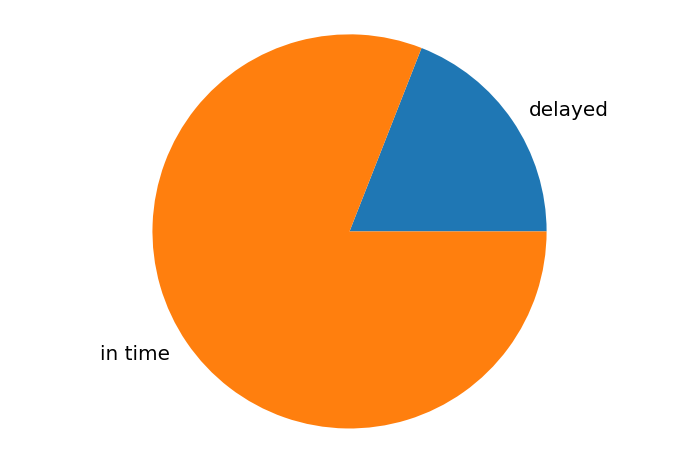

In [14]:
fig, ax = plt.subplots()
labels = 'delayed','in time'
sizes = [100000-80956, 80956]
ax.pie(sizes,labels = labels)
ax.axis('equal')

In [19]:
data['in time'] = (data['dep_delayed_15min'] == 'N').astype(int)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,late,in time
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,1,1
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,1,1
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,1,1
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,1,1
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,0,0


In [33]:
Distcat = pd.Series(np.zeros(100000))
a = data.loc[np.where(data['Distance']<500)]
b = data.loc[np.where((500<=data['Distance']) & (data['Distance']<1000))]
c = data.loc[np.where((1000<=data['Distance']) & (data['Distance']<1500))]
d = data.loc[np.where((1500<=data['Distance']) & (data['Distance']<2000))]
e = data.loc[np.where((2000<=data['Distance']) & (data['Distance']<2500))]
f = data.loc[np.where((2500<=data['Distance']) & (data['Distance']<3000))]
(Distcat.loc[a.index]) = '0-500'
(Distcat.loc[b.index]) = '500-1000'
(Distcat.loc[c.index]) = '1000-1500'
(Distcat.loc[d.index]) = '1500-2000'
(Distcat.loc[e.index]) = '2000-2500'
(Distcat.loc[f.index]) = '2500-3000'
data['Distcat']=Distcat
data.head()


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,late,in time,Distcat
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,1,1,500-1000
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,1,1,500-1000
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,1,1,0-500
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,1,1,500-1000
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,0,0,0-500


Text(0.5, 0, 'Dist, km')

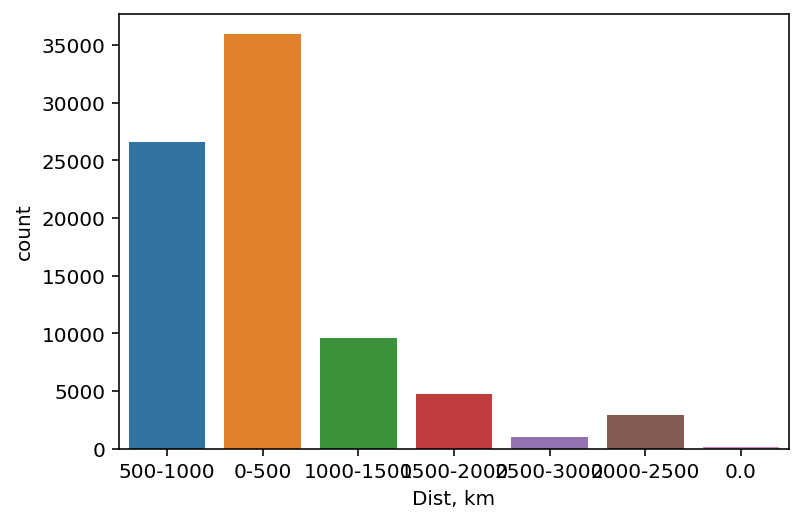

In [37]:
fig, ax = plt.subplots()
sb.countplot(x = 'Distcat', data = data[data['in time']==1])
ax.set_xlabel('Dist, km')

In [38]:
destination = data[data['dep_delayed_15min']=='Y']
destination.groupby('Dest').dep_delayed_15min.count().sort_values( ascending=False).head(5)

Dest
ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
Name: dep_delayed_15min, dtype: int64